In [ ]:
## libaries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
data = pd.read_csv(r"C:\Users\Pratik Shetty\Downloads\heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
## EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
## Features selection by vif & heat map technique & standardize the all the featuresi.e X in raw data

In [9]:
X = data.drop('target', axis=1)
y = data['target']

In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [11]:
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

In [12]:
scaled_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-0.268437,0.661504,-0.915755,-0.377636,-0.659332,-0.418878,0.891255,0.821321,-0.712287,-0.060888,0.995433,1.209221,1.089852
1,-0.158157,0.661504,-0.915755,0.479107,-0.833861,2.387330,-1.004049,0.255968,1.403928,1.727137,-2.243675,-0.731971,1.089852
2,1.716595,0.661504,-0.915755,0.764688,-1.396233,-0.418878,0.891255,-1.048692,1.403928,1.301417,-2.243675,-0.731971,1.089852
3,0.724079,0.661504,-0.915755,0.936037,-0.833861,-0.418878,0.891255,0.516900,-0.712287,-0.912329,0.995433,0.238625,1.089852
4,0.834359,-1.511706,-0.915755,0.364875,0.930822,2.387330,0.891255,-1.874977,-0.712287,0.705408,-0.624121,2.179817,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,0.661504,0.055931,0.479107,-0.484803,-0.418878,0.891255,0.647366,1.403928,-0.912329,0.995433,-0.731971,-0.522122
1021,0.613800,0.661504,-0.915755,-0.377636,0.232705,-0.418878,-1.004049,-0.352873,1.403928,1.471705,-0.624121,0.238625,1.089852
1022,-0.819834,0.661504,-0.915755,-1.234378,0.562371,-0.418878,-1.004049,-1.353113,1.403928,-0.060888,-0.624121,0.238625,-0.522122
1023,-0.488996,-1.511706,-0.915755,-1.234378,0.155137,-0.418878,-1.004049,0.429923,-0.712287,-0.912329,0.995433,-0.731971,-0.522122


In [13]:
variables = scaled_df
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["Features"] = X.columns

In [14]:
for i in range(variables.shape[1]):
    variance_inflation_factor(variables, i)

In [15]:
vif

,VIF,Features
0,1.428872,age
1,1.155948,sex
2,1.293277,cp
3,1.167890,trestbps
4,1.146047,chol
5,1.090063,fbs
6,1.064442,restecg
7,1.615182,thalach
8,1.419047,exang
9,1.708555,oldpeak


In [16]:
## since variance is not greater then 5  As per Vif we don't need to remove the features

<Axes: >

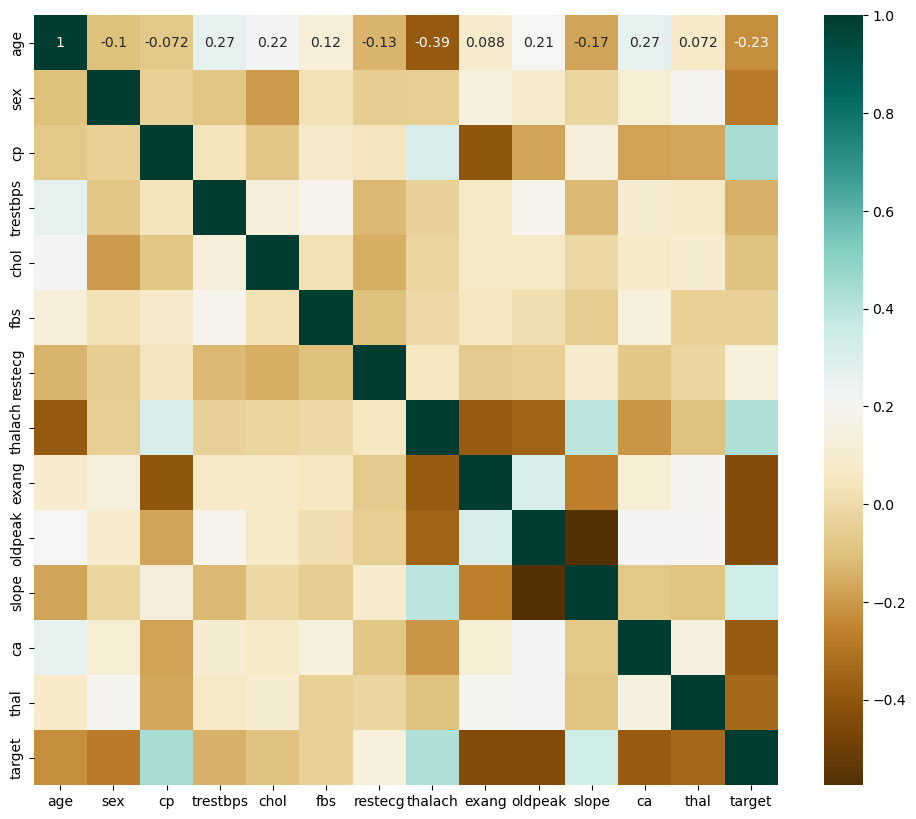

In [17]:
plt.figure(figsize=(12,10))
c = data.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

In [18]:
## As per heatmap,the Age is greater then 0.90 i.e 1 but we can't remove that as age is also important  featuresas & influence for target variavble(heart diseases prediction) & as per healthcare domain.So,other features have values are below 0.90 & -0.90 we will not remove that.Therefore all features are important as per heatmap & VIF.. 

In [19]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

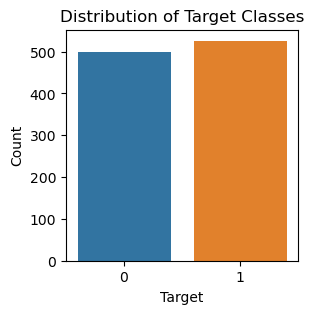

In [20]:
plt.figure(figsize=(3, 3))
sns.countplot(data=data, x='target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Distribution of Target Classes')
plt.show()

<Axes: xlabel='target'>

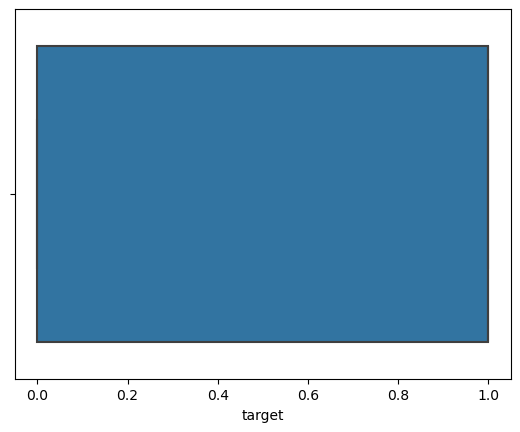

In [21]:
sns.boxplot(data=data, x='target')

In [22]:
## Logistic Regression Alogrithm

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state= 42)

In [24]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
Accuracy = accuracy_score(y_test,y_pred)
Confusion_mat = confusion_matrix(y_test,y_pred)
Classification_rep = classification_report(y_test,y_pred)

print(f"Accuracy:{Accuracy:.2f}")
print("Confusion_mat:\n",Confusion_mat)
print("Classification Report:\n",Classification_rep)

Accuracy:0.79
Confusion_mat:
 [[70 32]
 [12 91]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.69      0.76       102
           1       0.74      0.88      0.81       103

    accuracy                           0.79       205
   macro avg       0.80      0.78      0.78       205
weighted avg       0.80      0.79      0.78       205



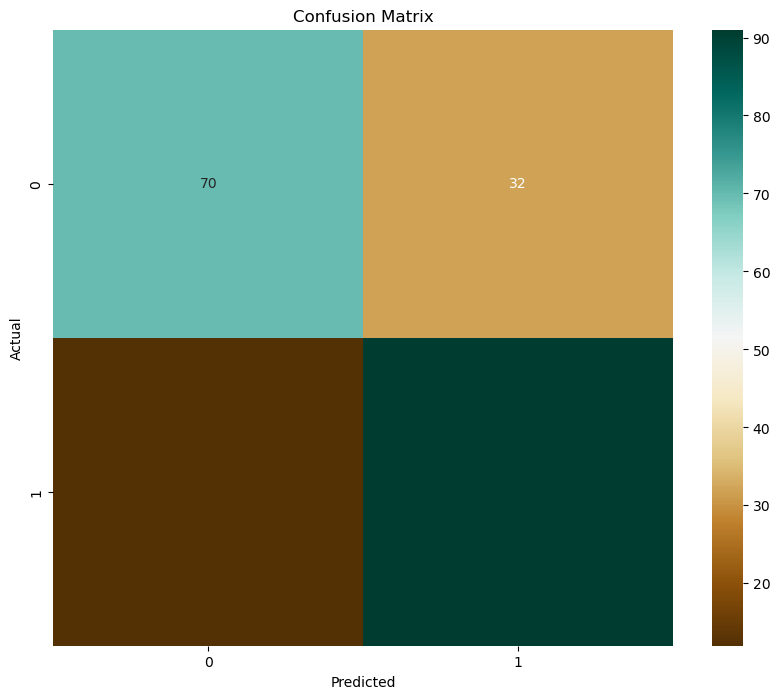

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(Confusion_mat,cmap = "BrBG", annot = True,fmt = "d",xticklabels= data["target"].unique(),yticklabels = data["target"].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
y_pred_prob = model.predict_proba(X_test)[:,1]
Auc_score  = roc_auc_score(y_test,y_pred_prob)
Fpr,Tpr,_ = roc_curve(y_test,y_pred_prob)

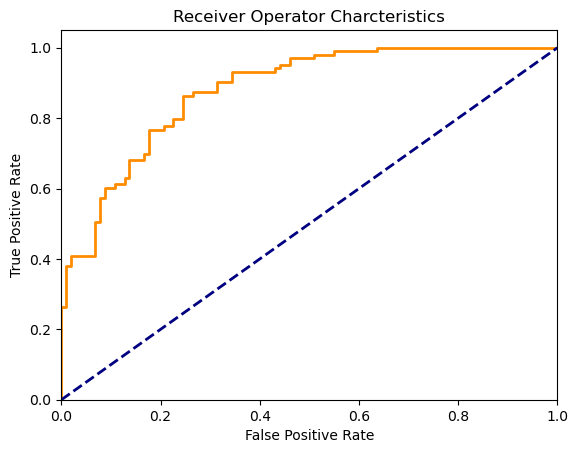

In [29]:
plt.figure()
plt.plot(Fpr,Tpr,color= "DarkOrange",lw=2,label = f"Roc(auc = {Auc_score:.2f}")
plt.plot([0,1],[0,1],color = "Navy", lw = 2,linestyle = "--")
plt.ylim([0.0,1.05])
plt.xlim([0.0,1.0])
plt.title("Receiver Operator Charcteristics")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [30]:
## Decision tree alogrtithm

In [32]:
clf = DecisionTreeClassifier()

In [33]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

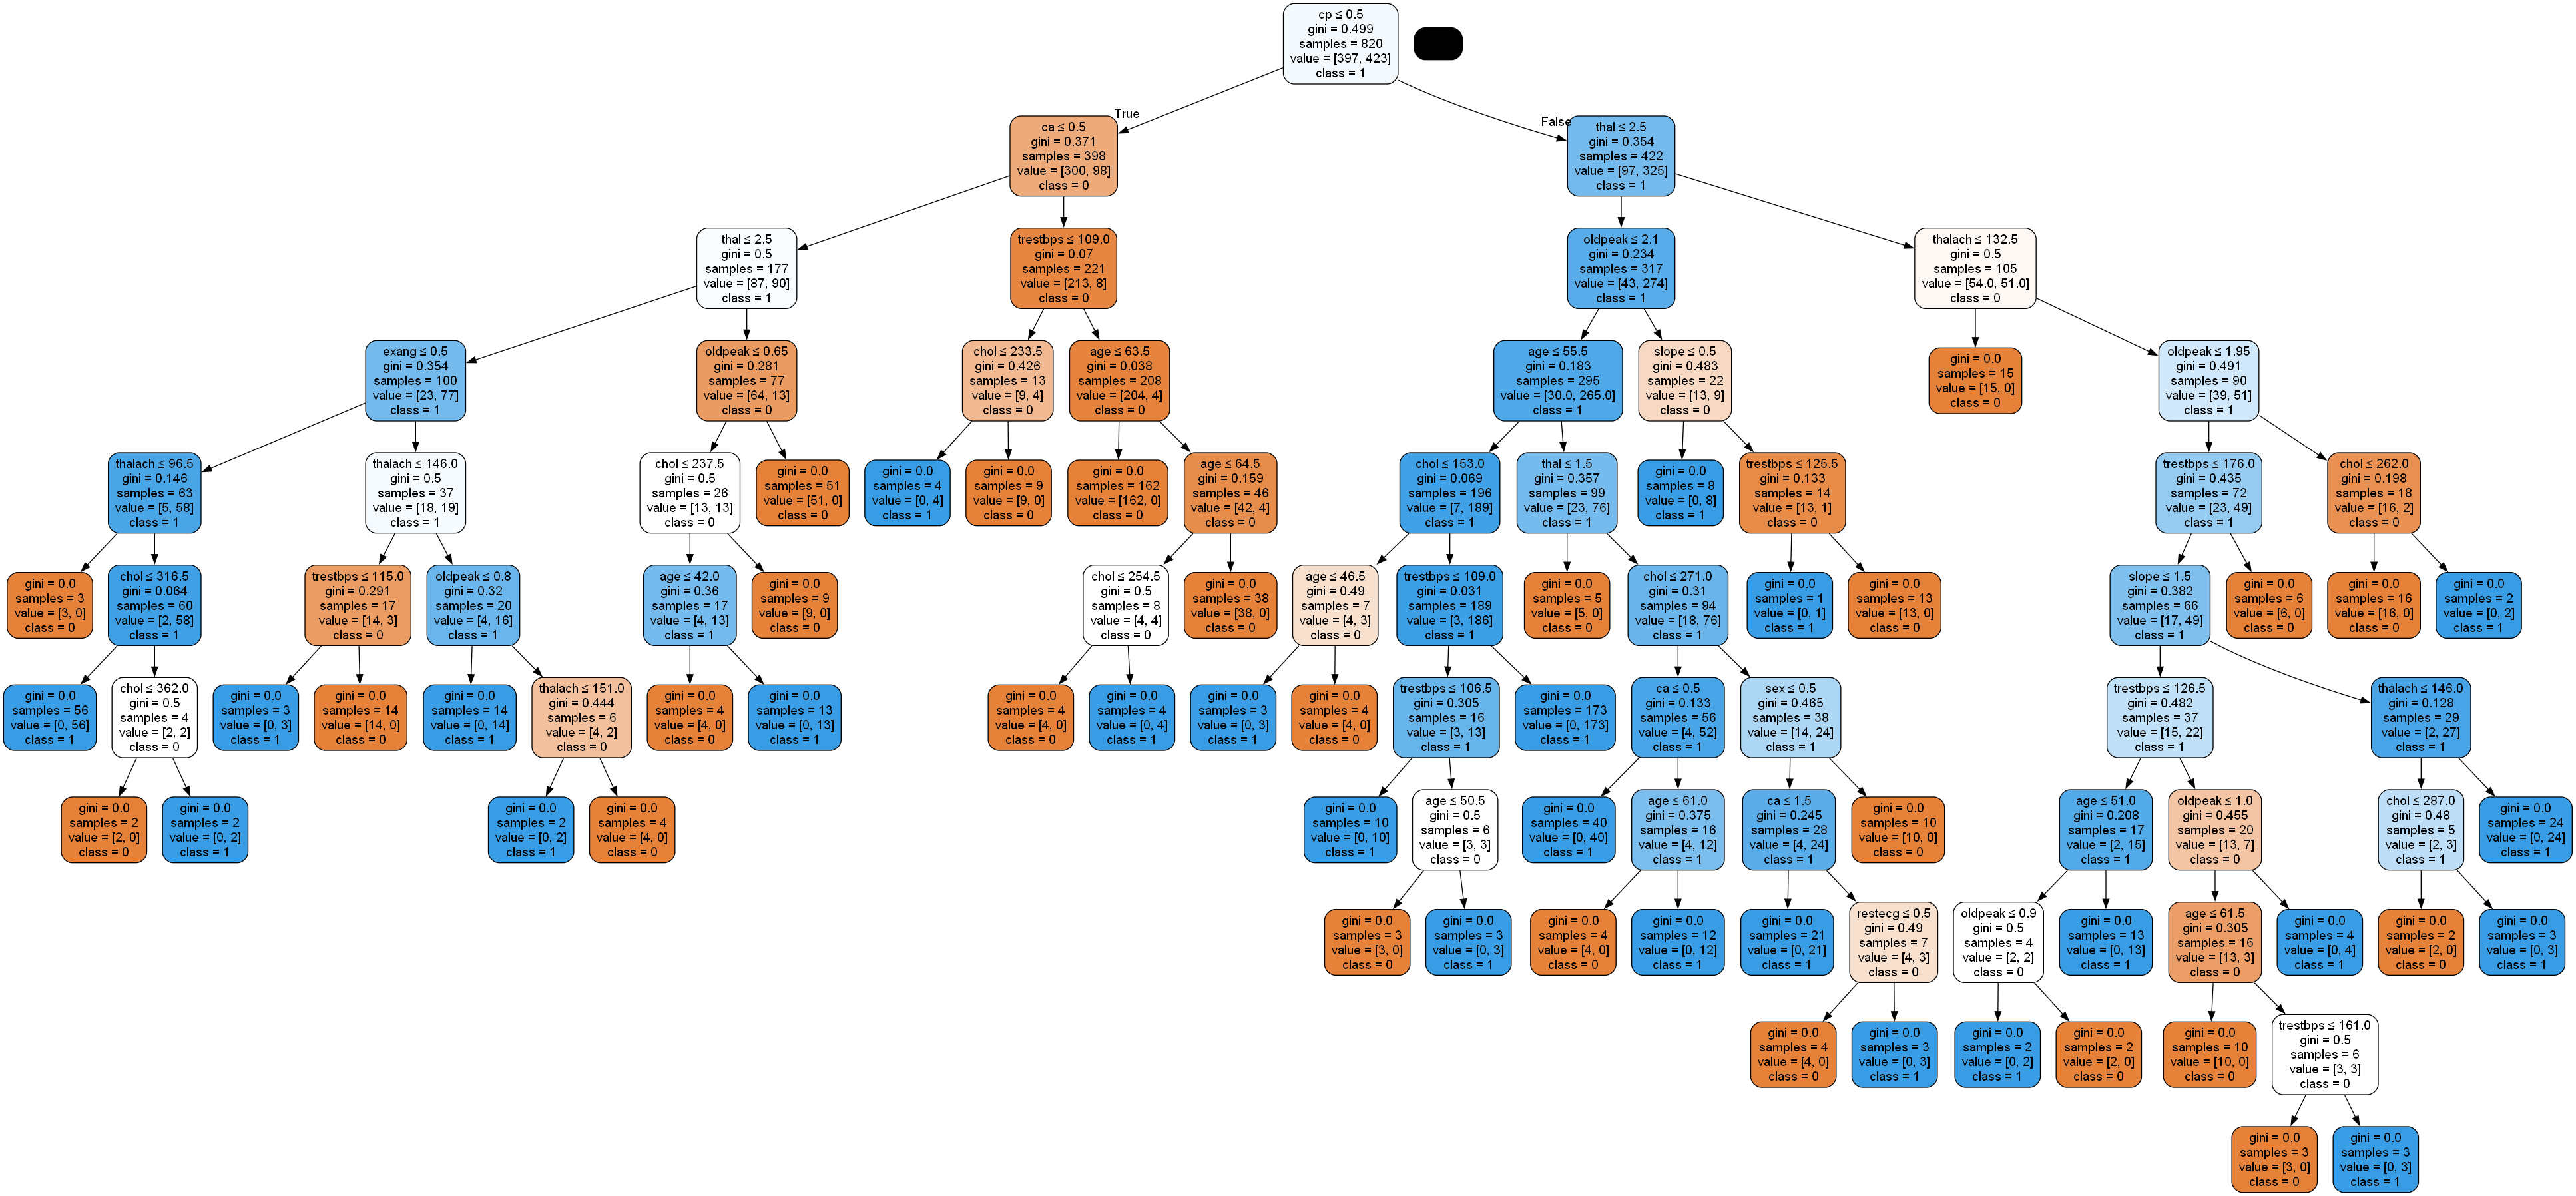

In [34]:

class_names = list(map(str, y.unique()))
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X.columns,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("Heart_decision_tree.png")
Image(graph.create_png())

In [35]:
y_pred = clf.predict(X_test)

In [36]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")

Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


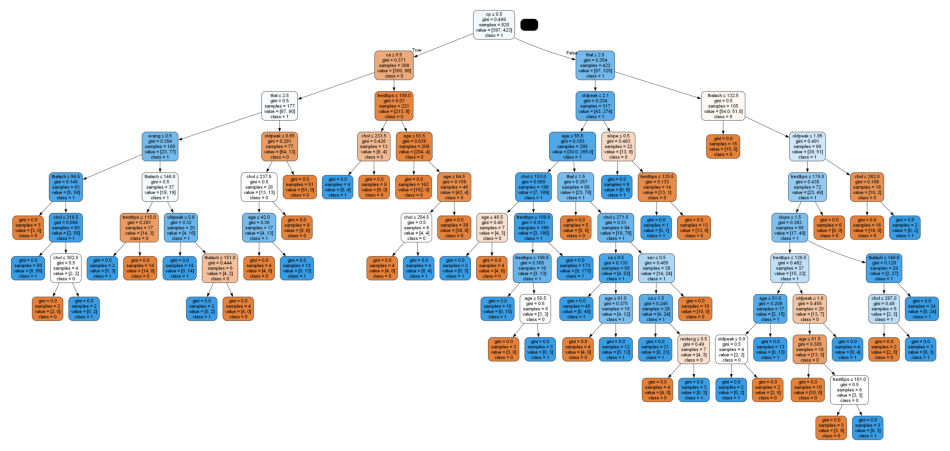

In [37]:
plt.figure(figsize=(12, 8))
plt.imshow(plt.imread("Heart_decision_tree.png"))
plt.axis('off')
plt.show()

In [38]:
## Random Forest Alogrithms

In [39]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
rf_y_pred = rf_clf.predict(X_test)

In [41]:
rf_accuracy = metrics.accuracy_score(y_test, rf_y_pred)
rf_precision = metrics.precision_score(y_test, rf_y_pred, average='weighted')
rf_recall = metrics.recall_score(y_test, rf_y_pred, average='weighted')
rf_f1_score = metrics.f1_score(y_test, rf_y_pred, average='weighted')

# Print evaluation metrics for Random Forest
print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")
print(f"F1 Score: {rf_f1_score:.2f}")

Random Forest Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


In [42]:
## Gradient Boosting Alogrithms

In [43]:
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [44]:
gb_y_pred = gb_clf.predict(X_test)

In [45]:
gb_accuracy = metrics.accuracy_score(y_test, gb_y_pred)
gb_precision = metrics.precision_score(y_test, gb_y_pred, average='weighted')
gb_recall = metrics.recall_score(y_test, gb_y_pred, average='weighted')
gb_f1_score = metrics.f1_score(y_test, gb_y_pred, average='weighted')

# Print evaluation metrics for Gradient Boosting
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")
print(f"F1 Score: {gb_f1_score:.2f}")


Gradient Boosting Metrics:
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93


In [46]:
print("\nComparision of models")
print(f"Logistic Regression Accuracy:{Accuracy:.2f}")
print(f"Accuracy of Decission tree: {accuracy:.2f}")
print(f"Randon Forest Accuracy:{rf_accuracy:.2f}")
print(f"Gradient Boosting:{gb_accuracy:.2f}")


Comparision of models
Logistic Regression Accuracy:0.79
Accuracy of Decission tree: 0.99
Randon Forest Accuracy:0.99
Gradient Boosting:0.93


In [95]:
###Summary
##In model used 4 alogrithms i.e LogisticRegression,Decision tree,RandomForest Gradient boosting.
## Accurcay of decision tree & random forest is 0.99 that means it is overfitting.So, we will not consider that
##comparsion of accuracy of logistic regression & Gradient boosting.The gradient boosting is giving  beter accuracy i.e 0.93.
## Conclusion:Gradient Boosting is better for the heart disease prediction models.